In [1]:
import pandas as pd
import seaborn as sb
from sklearn import tree

In [2]:
exam = pd.read_csv('sample_data/exams.csv')

In [3]:
exam.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


In [4]:
exam['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [5]:
X = exam.drop(columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])
y = exam['parental level of education']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=.25)

In [9]:
treeTry = tree.DecisionTreeClassifier()
treeTry.fit(X_train, y_train)

DecisionTreeClassifier()

In [11]:
treeTry.score(X_train, y_train), treeTry.score(X_test, y_test)

(1.0, 0.19733333333333333)

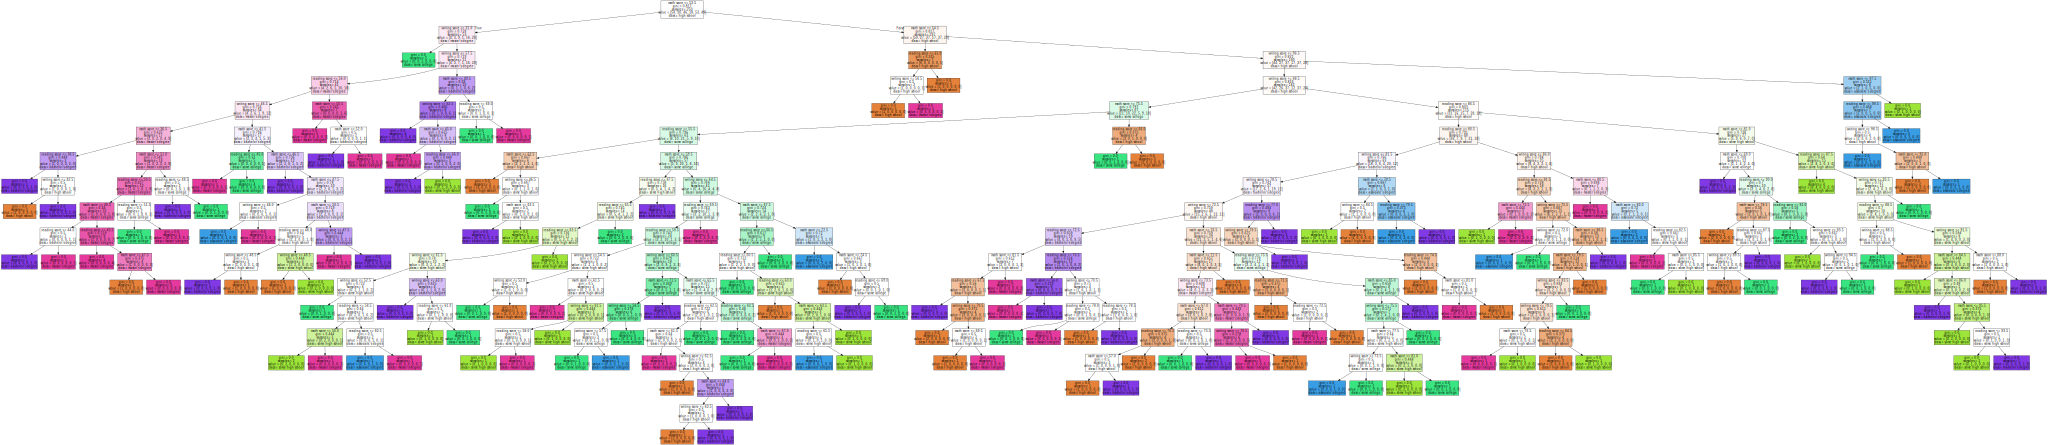

In [13]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(treeTry, feature_names=X.columns, class_names=y.unique(), filled=True)
graph = graphviz.Source(dot_data)  
graph